In [1]:
from functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("H:\FantasyMachineLearning\FantasyFootballMachineLearning\FantasyFootballData.csv")
data = data.fillna(0)

In [3]:
subset = data.drop(columns = ['Year', 'Name', 'Team', 'Passing Yds', 'Passing TD', 'Passing Int',
       'Rushing Yds', 'Rushing TD', 'Receiving Yds', 
       'Receiving TD', 'PPR', 'Fantasy Rank'])
y = subset['Points']
x = subset.drop(columns = ['Position','Points'])

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25)
rf = RandomForestRegressor(n_estimators = 1000, random_state = 88)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=88)

In [5]:
# Calculated Predictions Based on Random Forest
predictions = rf.predict(x_test)
# Retreive Model Metrics
modeleval(predictions,y_test)

,rmse,r^2,mae,mape,accuracy
0,14.641002,0.956133,8.92,14.615337,85.384663


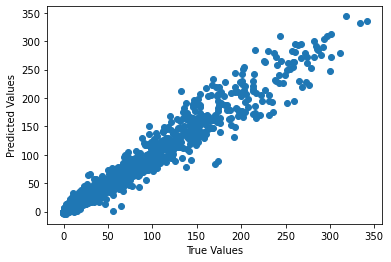

In [6]:
plt.scatter(predictions,y_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

Applying my model to the 2019 Season and comparing the difference between predictive values and actual values

In [8]:
data2019 = pd.read_csv('H:/FantasyMachineLearning/FantasyFootballMachineLearning/2019season.csv')
data2019 = data2019.fillna(0)
data2019.head()

,Player,Team,Position,Age,G,GS,Passing Cmp,Passing Att,Passing Yds,Passing TD,...,Rushing Y/A,Rushing TD,Receiving Tgt,Receiving Rec,Receiving Yds,Receiving Y/R,Receiving TD,FantPt,PosRank,OvRank
0,Christian McCaffrey*+,CAR,RB,23,16,16,0,2,0,0,...,4.83,15,142,116,1005,8.66,4,355.0,1,1.0
1,Lamar Jackson*+,BAL,QB,22,15,15,265,401,3127,36,...,6.85,7,0,0,0,NaN,0,416.0,1,2.0
2,Derrick Henry*,TEN,RB,25,15,15,0,0,0,0,...,5.08,16,24,18,206,11.44,2,277.0,2,3.0
3,Aaron Jones,GNB,RB,25,16,16,0,0,0,0,...,4.59,16,68,49,474,9.67,3,266.0,3,4.0
4,Ezekiel Elliott*,DAL,RB,24,16,16,0,0,0,0,...,4.51,12,71,54,420,7.78,2,258.0,4,5.0
